<a href="https://colab.research.google.com/github/Igor999dev/mushroom/blob/main/MVP_Cogumelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Problema da Identificação de Cogumelos Comestíveis e Venenosos**
### **Aluno:** Igor Klippel Campos
### **MVP (Produto Mínimo Viável) do Sprint:** Machine Learning & Analytics (40530010163_20240_01)

# Introdução

A humanidade tem uma história próxima dos cogumelos desde a pré-história, eles são utilizados para alimentação, medicina natural e para fins recreativos/alucinógenos.


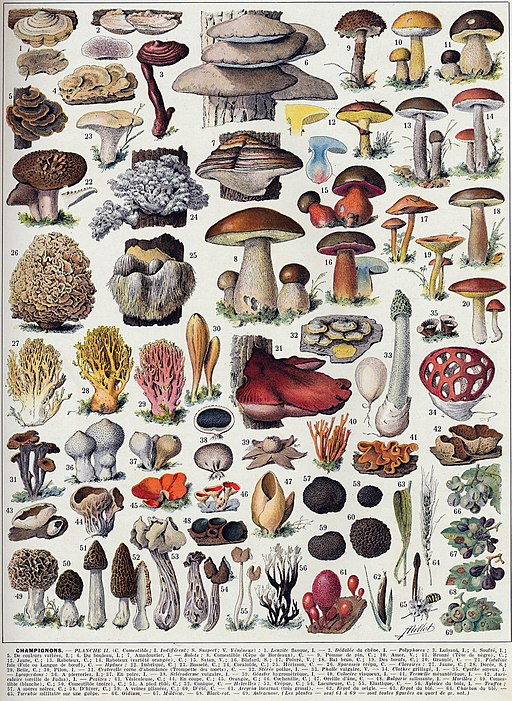

*Fonte da imagem: Champignons-couleurs 2 - Mushrooms colour plate 01. Ilustração em domínio público do Larousse du XXème siècle (1932), disponível no Wiki Commons.*

Os cogumelos são corpos frutíferos de fungos e são organismos essenciais no equilíbrio ecológico, pois são decompositores de materiais orgânicos. Presentes em diversos habitats, variam em formas, cores e tamanhos. Na alimentação, destacam-se por seu sabor e valor nutricional, sendo ricos em proteínas, fibras, vitaminas e minerais. Alguns têm propriedades medicinais, sendo usados na fitoterapia e na pesquisa farmacêutica. Outros, como os cogumelos alucinógenos, contêm compostos psicoativos com potencial terapêutico e recreativo. Apesar de sua utilidade, algumas espécies são tóxicas ou venenosas, exigindo conhecimento para consumo seguro. Em muitas culturas, simbolizam elementos da natureza, como o ciclo natural, a reutilização de matéria decomposta e a abertura de novas percepções por meio de suas propriedades alucinógenas, entre outros.



---


**O problema** que a humanidade enfrenta com o consumo de cogumelos é a dificuldade de distinguir entre os comestíveis e os tóxicos, já que não existe uma regra precisa para diferenciá-los. Por isso, o uso de aprendizado de máquina surge como uma solução promissora.

**O objetivo** deste notebook e deste MVP (Produto Mínimo Viável) é utilizar técnicas de aprendizado de máquina para resolver o problema de classificação binária de cogumelos comestíveis e venenosos.


**Hipótese:** É possível classificar cogumelos das famílias Agaricus e Lepiota como comestíveis ou tóxicos com uma precisão acima de 95%, utilizando algoritmos de aprendizado de máquina treinados com as características dos cogumelos. A performance do modelo será avaliada por meio de métricas como acurácia, precisão e matriz de confusão buscando resultados consistentes e confiáveis.

# O Banco de Dados

Para criar um modelo de aprendizado de máquina para classificação de cogumelos será utilizado um banco de dados cedido pelo UCI Machine Learning Repository este conjunto de dados contém descrições de amostras hipotéticas correspondentes a 23 espécies de cogumelos, pertencentes às famílias Agaricus e Lepiota. Cada espécie foi classificada como definitivamente comestível, definitivamente venenosa ou de comestibilidade desconhecida e não recomendada. As espécies desta última categoria foram agrupadas junto com as venenosas. O guia que acompanha os dados enfatiza que não existe uma regra simples para determinar se um cogumelo é comestível ou não.

**Condição:**
*   Os cogumelos classificados como "comestibilidade desconhecida"
foram agrupados com os "definitivamente venenosos" na categoria de não-comestíveis.
*   As duas classes estão balanceadas.

**Restrições:**
*   As variáveis do dataset são categóricas, exigindo pré-processamento.
*   O dataset representa apenas cogumelos encontrados em ambientes específicos, podendo não ser generalizável globalmente.
*   A ausência de dados sobre os locais nativos das diferentes espécies pode limitar a aplicabilidade do modelo em situações reais.



---



Em seguida, vamos importar as bibliotecas necessárias, carregar o dataset e realizar uma pré-análise.

In [ ]:
# Importando as Bibliotecas Necessárias

import pandas as pd # Manipulação de dados
import numpy as np # Cálculos numéricos
import matplotlib.pyplot as plt # Criação de gráficos
import seaborn as sns # Visualização de dados avançada
import warnings # Controle de avisos
warnings.filterwarnings('ignore')

# Ferramentas para pré-processamento dos dados
from sklearn.model_selection import train_test_split  # Divisão dos dados em treino e teste
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler # Codificação de rótulos e padronização
from sklearn.model_selection import KFold # Validação cruzada

# Modelos de classificação
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.svm import SVC # Support Vector Machine (SVM)
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Machines (GBM)
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB # Naive Bayes

# Ferramentas para avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Relatório de classificação, matriz de confusão e acurácia
from sklearn.model_selection import cross_val_score, GridSearchCV # Relatório e ajuste de parâmetros


In [ ]:
# Importando o dataset
url = 'https://raw.githubusercontent.com/Igor999dev/mushroom/refs/heads/main/agaricus-lepiota.data'

# Lista de colunas
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color',
           'ring-number', 'ring-type', 'spore-print-color',
           'population', 'habitat']

# Lendo o arquivo
df = pd.read_csv(url, names=columns)

# Visualizar as primeiras linhas
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Este é o dataset com o qual vamos trabalhar neste MVP. Em cima você pode ver suas 10 primeiras linhas, ele contém 23 colunas, sendo uma delas a variável alvo, denominada 'class', que é a classe que queremos prever.

In [ ]:
# Checar informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Nosso dataset contém 8124 entradas, e seus dados estão no formato de texto. Precisamos converter eles para o formato numérico para aplicar no modelo. A boa notícia é que não há colunas com entradas faltando ou nulas. O dataset possui 1,4 MB.

In [ ]:
# Resumo estatístico
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Para compreender esse resumo estatístico, é necessário entender o que cada letra significa no nosso dataset. Em vez de escrever 'Edible' ou 'Poisonous', o dataset possui apenas 'e' e 'p', e o mesmo ocorre em cada coluna. Por isso, vou explicar o que significa cada abreviação e a sua tradução em português em parenteses.

Class(Classe alvo):	(comestível)edible=e, (venenoso)poisonous=p.

Cap-shape(formato do topo): (sino)bell=b, (cônico)conical=c, (convexo)convex=x, (plano)flat=f, (nodoso)knobbed=k, (afundado)sunken=s.

Cap-surface(textura do topo): (fibroso)fibrous=f, (ranhuras)grooves=g,(escamoso)scaly=y, (suave)smooth=s.

Cap-color(cor do topo): (marrom)brown=n, (amarelo-marrom)buff=b, (canela)cinnamon=c, (cinza)gray=g, (verde)green=r, (rosa)pink=p, (roxo)purple=u, (vermelho)red=e, (branco)white=w, (amarelo)yellow=y.

Bruises(hematomas): (hematomas)bruises=t, (não)no=f.

Odor(odor): (amêndoa)almond=a, (anis)anise=l, (creosote)creosote=c, (odor de peixe)fishy=y, (desagradável)foul=f, (mofado)musty=m, (nenhum)none=n, (pungente)pungent=p, (picante)spicy=s.

Gill-attachment(Afixação das brânquias): (adjunto)attached=a, (descendo)descending=d, (solto)free=f, (entalhado)notched=n.

Gill-spacing(espaçamento branquial): (próximo)close=c, (superlotado)crowded=w, (distante)distant=d.

Gill-size(tamanho branquial): (largo)broad=b, (estreito)narrow=n.

Gill-color(cor branquial): (preto)black=k, (marrom)brown=n, (amarelo-marrom)buff=b, (chocolate)chocolate=h, (cinza)gray=g, (verde)green=r, (laranja)orange=o, (rosa)pink=p, (roxo)purple=u, (vermelho)red=e, (branco)white=w,(amarelo)yellow=y.

Stalk-shape(formato do caule): (ampliando)enlarging=e, (afinando)tapering=t.

Stalk-root(raiz do caule): (bulboso)bulbous=b, (clava)club=c, (xícara)cup=u, (igual)equal=e, (rizomorfos)rhizomorphs=z, (enraizado)rooted=r, (ausente)missing=?.

Stalk-surface-above-ring(superfície do caule acima do anel): (fibroso)fibrous=f, (escamoso)scaly=y, (sedoso)silky=k, (suave)smooth=s.

Stalk-surface-below-ring(superfície do caule abaixo do anel): (fibroso)fibrous=f, (escamoso)scaly=y, (sedoso)silky=k, (suave)smooth=s.

Stalk-color-above-ring(cor do caule acima do anel): (marrom)brown=n, (amarelo-marrom)buff=b, (canela)cinnamon=c, (cinza)gray=g, (laranja)orange=o, (rosa)pink=p, (vermelho)red=e, (branco)white=w, (amarelo)yellow=y.

Stalk-color-below-ring(cor do caule abaixo do anel): (marrom)brown=n, (amarelo-marrom)buff=b, (canela)cinnamon=c, (cinza)gray=g, (laranja)orange=o, (rosa)pink=p, (vermelho)red=e, (branco)white=w, (amarelo)yellow=y.

Veil-type(tipo de capa): (parcial)partial=p, (universal)universal=u.

Veil-color(cor da capa): (marrom)brown=n, (laranja)orange=o, (branco)white=w, (amarelo)yellow=y.

Ring-number(número de aneis): (nenhum)none=n, (um)one=o, (dois)two=t.

Ring-type (tipo de anel): (teia de aranha)cobwebby=c, (evanescente)evanescent=e, (cintilante)flaring=f, (largo)large=l, (nenhum)none=n, (pingente)pendant=p, (revestimento)sheathing=s, (zona)zone=z.

Spore-print-color(cor de impressão de esporo): (preto)black=k, (marrom)brown=n,(amarelo-marrom)buff=b, (chocolate)chocolate=h, (verde)green=r, (laranja)orange=o, (roxo)purple=u, (branco)white=w, (amarelo)yellow=y.

Population(população): (abundante)abundant=a, (agrupado)clustered=c, (numerosos)numerous=n, (espalhado)scattered=s, (diversos)several=v, (solitário)solitary=y.

Habitat(habitat): (gramado)grasses=g, (folhas)leaves=l, (prados)meadows=m, (caminhos)paths=p, (urbano)urban=u, (lixo)waste=w, (floresta)woods=d.

In [ ]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for {column}:")
    print(value_counts)
    print("\n")

Value counts for class:
class
e    4208
p    3916
Name: count, dtype: int64


Value counts for cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


Value counts for cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64


Value counts for cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


Value counts for bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64


Value counts for odor:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


Value counts for gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64


Value counts for gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64


Value counts for gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64


Value counts for

Acima, é apresentada a distribuição de cada categoria, e podemos notar que a coluna 'veil-type' é uma feature inútil, pois todas as entradas possuem o mesmo valor. Também temos um problema com a coluna 'stalk-root', onde uma boa parte das entradas está com o valor desconhecido.


---

Temos a opção de preencher os dados desconhecidos da coluna 'stalk-root' com a moda das outras categorias. No entanto, essa solução não parece ideal para este modelo, pois a coluna contém muitos valores ausentes, e preencher os dados pode não ser a melhor abordagem. Além disso, já existe uma propensão para overfitting devido à alta correlação entre os dados. Por isso, vamos excluir as colunas 'veil-type' e 'stalk-root'.

In [ ]:
# Exclusão de colunas
df = df.drop(columns=['veil-type', 'stalk-root'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

Concluindo a análise do dataset e após alguns ajustes, é hora de começar o aprendizado de máquina.

# O Modelo

In [ ]:
# Separando X e y
X = df.drop('class', axis=1)
y = df['class']

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,s,s,w,w,w,o,e,n,a,g


O conjunto de dados foi dividido em duas partes: 'X', que contém todas as features (características), e 'y', que contém os rótulos da classe correspondente a cada entrada.

In [ ]:
print(y)

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object


A tabela de "y" possuí só uma coluna.

In [ ]:
# Dividindo o conjunto de dados em dados de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Para treinar e avaliar os modelos de classificação, o dataset de cogumelos será dividido em dois conjuntos: um conjunto de treinamento (80%) e um conjunto de teste (20%). A variável X contém as características dos cogumelos, enquanto y indica se o cogumelo é comestível ou venenoso. Os dados do conjunto de treinamento serão usados para ajustar os modelos, enquanto os dados do conjunto de teste serão utilizados posteriormente para validar o desempenho dos modelos.

---


Como os modelos de aprendizado de máquina geralmente trabalham com dados numéricos, é preciso converter as características categóricas (como cores) em uma representação numérica. Para isso, utilizamos o One-Hot Encoding. Essa técnica cria novas colunas binárias para cada categoria, evitando a criação de uma hierarquia artificial entre elas (como no caso do Label Encoding, onde 'rosa' poderia ser considerado 'maior' que 'marrom').

Por outro lado, para o rótulo da classe (target), utilizamos o Label Encoding, pois estamos lidando com uma classificação binária (0 ou 1). O One-Hot Encoding no target criaria uma coluna adicional, o que não é necessário e poderia causar confusão na interpretação dos resultados.


In [ ]:
# Inicializar o OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajuste e transformação das variáveis categóricas
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print(X_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 1 0 ... 0 0 1]


Tanto o One-Hot Encoder quanto o Label Encoder foram capazes de transformar o dataset em uma tabelas binárias.

Após a conversão dos dados textuais para valores numéricos, podemos realizar análises mais aprofundadas.


---

O código a seguir tem como objetivo criar uma matriz de correlação entre as variáveis, permitindo-nos identificar quais variáveis são diretamente ou inversamente proporcionais.

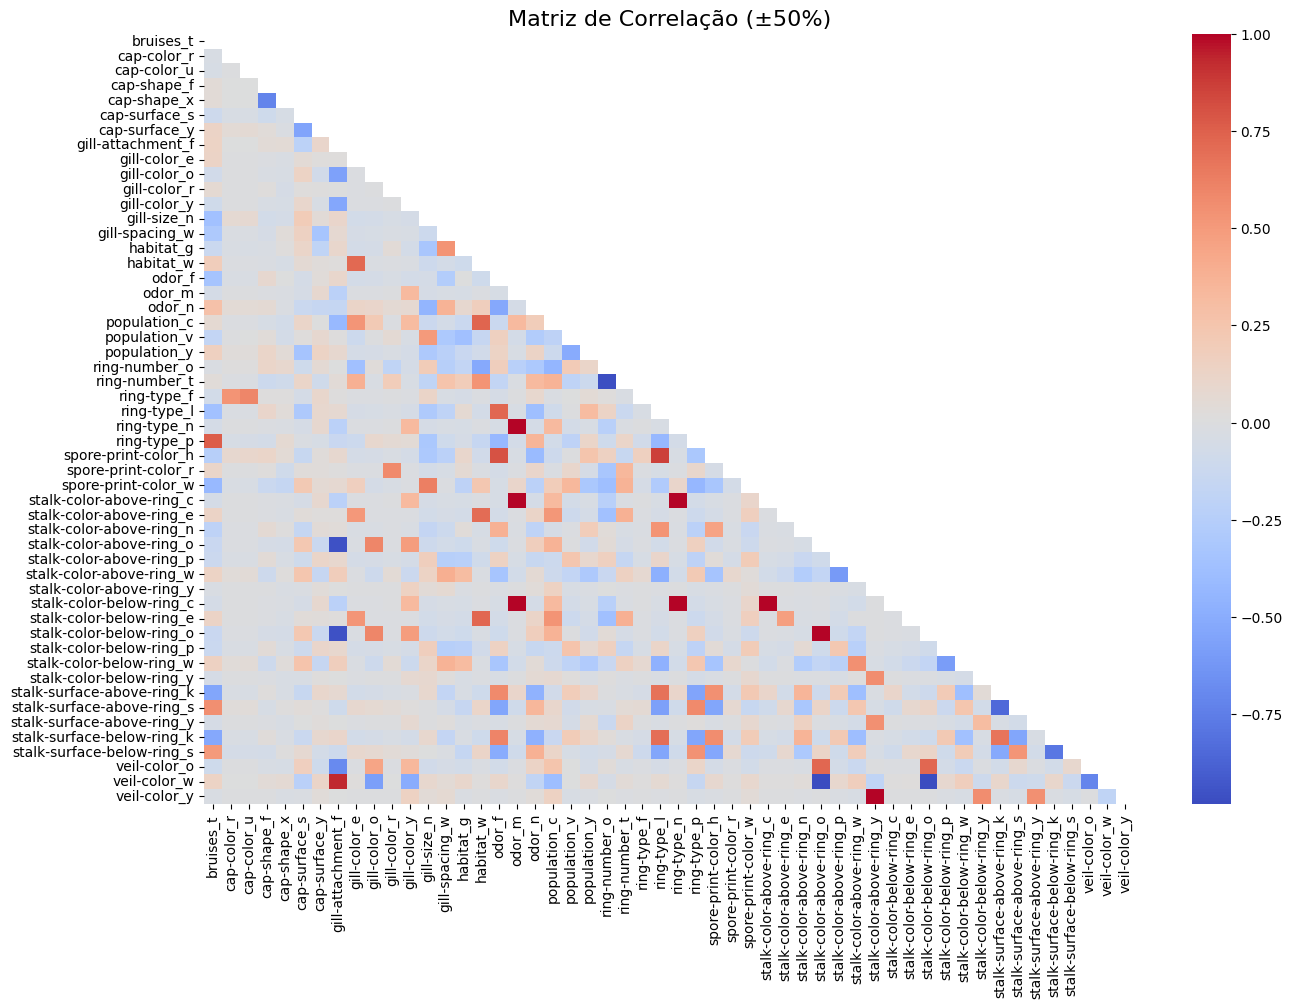

In [ ]:
# Converter o resultado do OneHotEncoder em DataFrame
X_train_df = pd.DataFrame(X_train, columns=encoder.get_feature_names_out())
X_test_df = pd.DataFrame(X_test, columns=encoder.get_feature_names_out())

# Calcular a matriz de correlação
correlation_matrix = X_train_df.corr()

# Define o threshold
threshold = 0.5

# Identificar features com correlação acima do threshold
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Converter para lista e alinhar a ordem
relevant_features = list(highly_correlated_features)
relevant_features.sort()  # Garante consistência na ordem

# Filtrar a matriz de correlação
filtered_corr_matrix = correlation_matrix.loc[relevant_features, relevant_features]

# Criar a máscara para ocultar o triângulo superior
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Criar o heatmap filtrado
plt.figure(figsize=(15, 10))  # Ajustar o tamanho do gráfico
sns.heatmap(
    filtered_corr_matrix,  # Matriz filtrada
    mask=mask,  # Aplicar a máscara
    cmap='coolwarm',
    cbar=True,
    fmt=".2f"
)
plt.title("Matriz de Correlação (±50%)", fontsize=16)
plt.show()

Apesar de aplicarmos alguns ajustes para facilitar a compreensão, a matriz de correlação apresentou um padrão bastante caótico. Mesmo assim, conseguimos identificar algumas correlações interessantes, como:

*   Quando a capa é amarela, o caule acima do anel também tende a ser amarelo.
*   Se a capa for branca, há uma alta probabilidade de as brânquias estarem soltas e o caule, tanto acima quanto abaixo do anel, não ser laranja.
*   Cogumelos com odor de mofo tendem a ter o caule, tanto acima quanto abaixo do anel, com coloração canela.


---


Essas correlações são relevantes para entendermos o problema, mas não são suficientes para classificar os cogumelos com precisão. Vamos, portanto, analisar as correlações em relação à variável alvo (y)

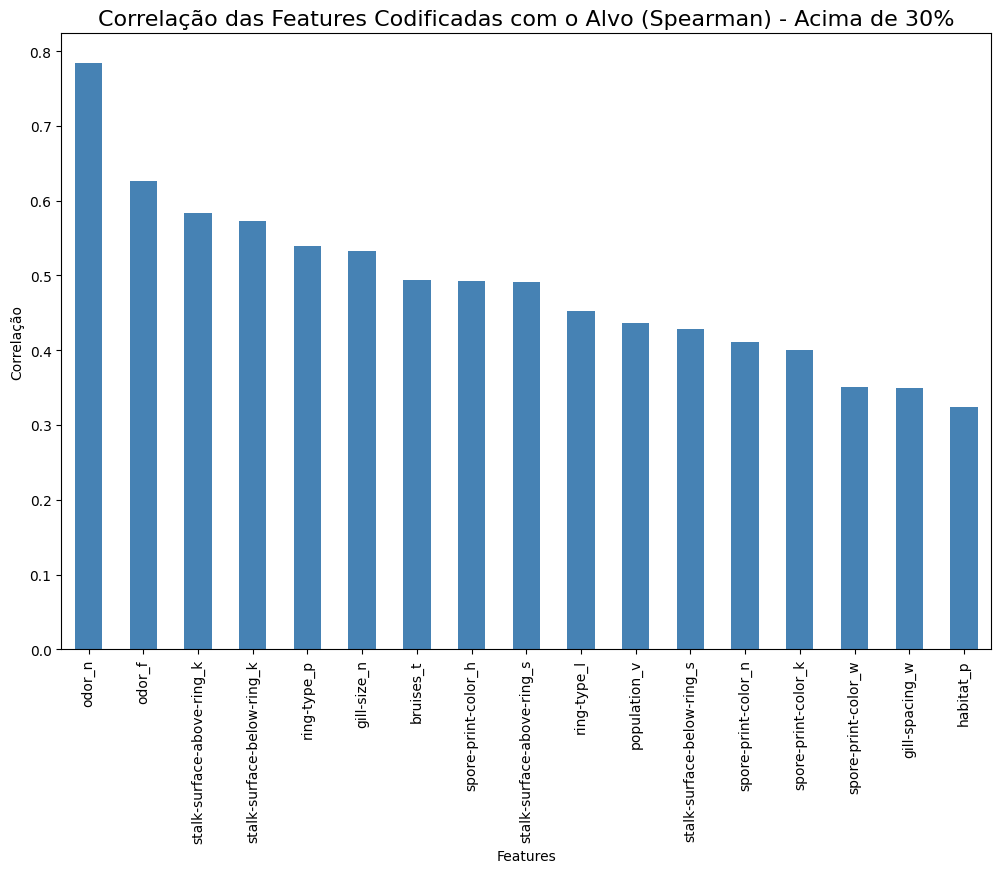

odor_n                        0.784412
odor_f                        0.626151
stalk-surface-above-ring_k    0.583935
stalk-surface-below-ring_k    0.572075
ring-type_p                   0.539634
gill-size_n                   0.533244
bruises_t                     0.493566
spore-print-color_h           0.491978
stalk-surface-above-ring_s    0.490681
ring-type_l                   0.452176
population_v                  0.435716
stalk-surface-below-ring_s    0.428280
spore-print-color_n           0.411217
spore-print-color_k           0.399691
spore-print-color_w           0.350379
gill-spacing_w                0.349855
habitat_p                     0.324081
Name: target, dtype: float64


In [ ]:
# Adicionar y_train ao DataFrame de X_train para análise conjunta
X_train_df['target'] = y_train

# Calcular correlação entre cada feature e o alvo usando Spearman
correlation_with_target = X_train_df.corr(method='spearman')['target'].drop('target')

# Filtrar correlações acima de 30% (0.3)
correlation_with_target = correlation_with_target[correlation_with_target.abs() > 0.3]

# Ordenar as correlações por magnitude (absoluto)
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

# Plotar as correlações
plt.figure(figsize=(12, 8))
correlation_with_target.plot(kind='bar', color='steelblue')
plt.title("Correlação das Features Codificadas com o Alvo (Spearman) - Acima de 30%", fontsize=16)
plt.ylabel("Correlação")
plt.xlabel("Features")
plt.show()
print(correlation_with_target)

Observamos que algumas características se correlacionam significativamente com a comestibilidade do cogumelo. Os fatores que mais influenciam essa classificação são a ausência de odor e a presença de odor desagradável.

Diante do alto grau de overfitting observado em nosso dataset, optamos por utilizar a validação cruzada como estratégia de avaliação do modelo. Essa técnica consiste em dividir o conjunto de dados em k partes, treinando o modelo em k-1 partes e avaliando-o na parte restante. Ao repetir esse processo k vezes, obtemos uma estimativa mais robusta do desempenho do modelo em dados não vistos.

In [ ]:
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

Em seguida, procederemos à inicialização dos modelos. Os modelos selecionados são adequados para problemas de classificação, como o que estamos abordando.

In [ ]:
# Inicializando os modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# Dicionário para armazenar os resultados da validação cruzada
cv_results = {}

for name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Avaliação utilizando validação cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    cv_results[name] = {'Mean Accuracy': cv_mean, 'Std': cv_std}

    # Imprimindo os resultados da validação cruzada
    print(f"Modelo: {name}")
    print(f"Acurácia Média (Validação Cruzada): {cv_mean:.4f}")
    print(f"Desvio Padrão: {cv_std:.4f}")
    print("-" * 50)

Modelo: Logistic Regression
Acurácia Média (Validação Cruzada): 0.9995
Desvio Padrão: 0.0010
--------------------------------------------------
Modelo: SVM
Acurácia Média (Validação Cruzada): 1.0000
Desvio Padrão: 0.0000
--------------------------------------------------
Modelo: Random Forest
Acurácia Média (Validação Cruzada): 1.0000
Desvio Padrão: 0.0000
--------------------------------------------------
Modelo: Gradient Boosting
Acurácia Média (Validação Cruzada): 0.9995
Desvio Padrão: 0.0010
--------------------------------------------------
Modelo: KNN
Acurácia Média (Validação Cruzada): 1.0000
Desvio Padrão: 0.0000
--------------------------------------------------
Modelo: Naive Bayes
Acurácia Média (Validação Cruzada): 0.9802
Desvio Padrão: 0.0034
--------------------------------------------------


Dos seis modelos utilizados, três alcançaram uma acurácia de 1.0: o SVM, o Random Forest e o KNN. Isso significa que, em 100% dos casos, esses modelos identificaram corretamente se o cogumelo era comestível ou venenoso. À primeira vista, esse resultado pode parecer excelente, mas também pode ser um indicativo de overfitting, que ocorre quando o modelo se ajusta excessivamente aos dados específicos do dataset, em vez de aprender padrões generalizáveis.

Contudo, alguns fatores sugerem que o overfitting pode não ter ocorrido. Utilizamos K-Folds Cross-Validation para avaliar os modelos, garantindo que as amostras fossem validadas em diferentes combinações de treino e teste, o que reduz a chance de resultados inflados. Além disso, tomamos cuidado para evitar qualquer vazamento de dados, como informações da variável alvo sendo incorporadas às features de treinamento.

Apesar de ser improvável que tenha ocorrido overfitting nos três modelos mencionados, decidimos ajustar os hiperparâmetros apenas para a Logistic Regression. Isso foi motivado por dois fatores principais: primeiro, os modelos que já atingiram 100% de acurácia (SVM, Random Forest e KNN) não podem melhorar ainda mais; segundo, o Gradient Boosting, que obteve a mesma acurácia da Logistic Regression, demanda muito mais tempo para processar a validação dos hiperparâmetros. Além disso, o Naive Bayes teve desempenho inferior aos demais modelos.

Após os ajustes, tanto a Logistic Regression quanto o Gradient Boosting conseguiram alcançar uma acurácia de 1.0. Assim, optamos por priorizar a Logistic Regression, já que oferece resultados equivalentes ao Gradient Boosting, mas com menor custo computacional, permitindo rodar o notebook sem longos tempos de espera.

In [ ]:
# Definição dos grids de parâmetros
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 5, 7]}

# GridSearchCV para Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=10, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Avaliação no conjunto de teste
best_lr = grid_search_lr.best_estimator_
test_accuracy_lr = best_lr.score(X_test, y_test)

print("Melhores parâmetros para Logistic Regression:", grid_search_lr.best_params_)
print("Melhor acurácia (validação cruzada) para Logistic Regression:", grid_search_lr.best_score_)
print("Acurácia no conjunto de teste para Logistic Regression:", test_accuracy_lr)


Melhores parâmetros para Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor acurácia (validação cruzada) para Logistic Regression: 1.0
Acurácia no conjunto de teste para Logistic Regression: 1.0


# Conclusão

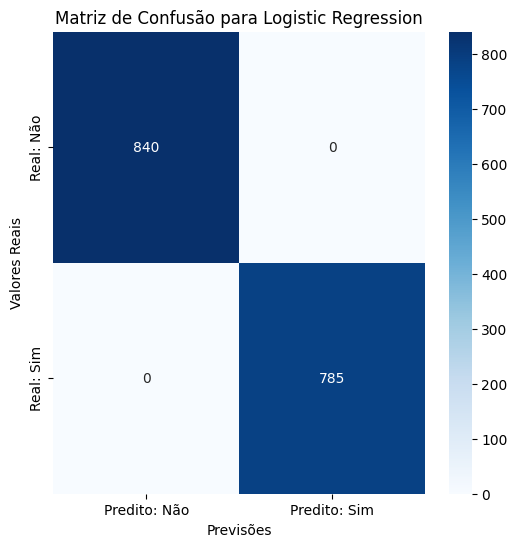

Matriz de Confusão para Logistic Regression:
[[840   0]
 [  0 785]]


In [ ]:
# Gerando as previsões de classe
y_pred_lr = best_lr.predict(X_test)

# Calculando a matriz de confusão
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plotando a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predito: Não', 'Predito: Sim'], yticklabels=['Real: Não', 'Real: Sim'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão para Logistic Regression')
plt.show()

# Exibindo a matriz de confusão
print("Matriz de Confusão para Logistic Regression:")
print(conf_matrix_lr)

Para concluir, podemos observar na matriz de confusão que, assim como a acurácia indicou, o modelo acertou em todos os casos se o cogumelo era comestível ou venenoso. Poderíamos utilizar outras métricas para avaliar o modelo, como o F1-Score e a curva ROC, porém, assim como a matriz de confusão, elas não trariam novas perspectivas, pois o modelo não cometeu erros de classificação.

**A hipótese foi confirmada: conseguimos criar um modelo de aprendizado de máquina que consegue classificar um cogumelo como comestível ou venenoso com os dados que obtivemos.**